In [4]:
#Imports
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm, datasets
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#function to plot data
def plotData(features, labels, cls, class_names):
  colors = ['r', 'b', 'g']
  markers = ['o', '*', '+']
  for class_index in range(len(cls)):
   plt.scatter(features[labels == cls[class_index], 0], features[labels == cls[class_index], 1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
  Title = "Iris Dataset with {n} classes" .format(n=int(len(cls)))
  plt.title(Title)
  plt.xlabel('Petal Length (cm)' )
  plt.ylabel('Petal width (cm)' )
  plt.legend()

#function to plot Regions    
def plotRegions(model):
 ax = plt.gca()
 xlim = ax.get_xlim()
 ylim = ax.get_ylim()
 xx = np.linspace(xlim[ 0], xlim[1], 50)
 yy = np.linspace(ylim[ 0], ylim[1], 50)
 XX, YY = np.meshgrid(xx, yy)
 z = np.vstack([XX.ravel(), YY.ravel()]).T
 ZZ = model.decision_function(z) .reshape(XX.shape)
 ax.contourf(XX, YY, ZZ, colors=[ 'c','y'], levels=0, alpha=0.2)






In [5]:
#Load our dataset
iris = load_iris()
#print(iris)

#(1)Drop the first&second  features
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target
print(X)

#Will be used for plotting
colors = ['r', 'b', 'g']
markers = ['o', '*', '+']
cls=[0, 1, 2]
class_names = {}
for i, label in enumerate( iris.target_names):
 class_names[i] = label


[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [6]:
#binarize the labels
yBin1 = label_binarize(y, classes=[0])
print(yBin1)
yBin2 = label_binarize(y, classes=[1])
#print(yBin2)
yBin3 = label_binarize(y, classes=[2])
#print(yBin3)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


c:\users\mahmoud sami\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\mahmoud sami\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\mahmoud sami\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[[100   0]
 [  0  50]]
Outcome values : 
 100 0 0 50
[[89 11]
 [49  1]]
Outcome va

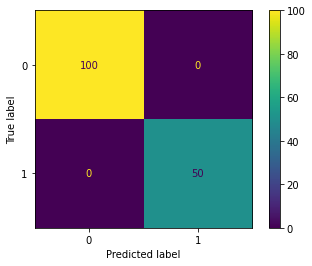

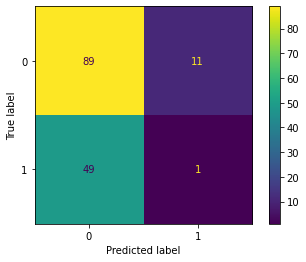

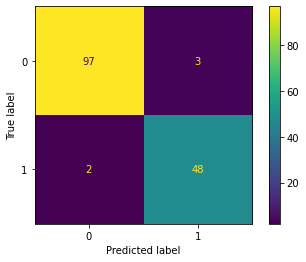

Accuracy: 1.0
F1: 1.0
Accuracy: 0.6
F1: 0.6
Accuracy: 0.9666666666666667
F1: 0.9666666666666667


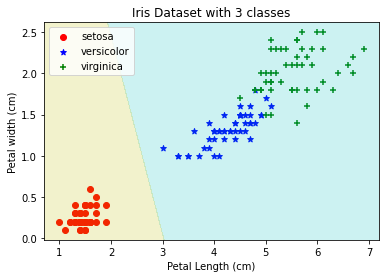

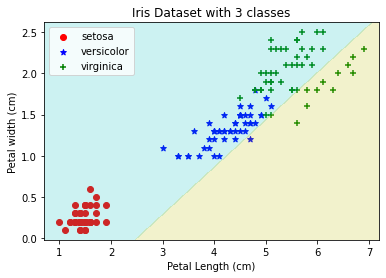

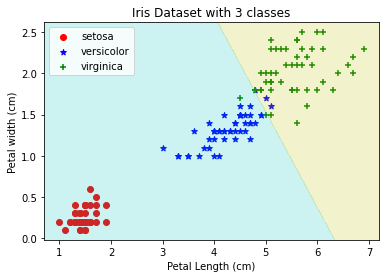

In [7]:
# Build OvR-LR

mLr1=LogisticRegression().fit(X, yBin1)
yLr1=mLr1.predict(X)
print(yLr1)

mLr2=LogisticRegression().fit(X, yBin2)
yLr2=mLr2.predict(X)
print(yLr2)

mLr3=LogisticRegression().fit(X, yBin3)
yLr3=mLr3.predict(X)
print(yLr3)


# Build CONFUSION Matrix

cm1=confusion_matrix(yBin1,yLr1)
print(cm1)
tn, fp, fn, tp = confusion_matrix(yBin1,yLr1).ravel()
print('Outcome values : \n', tn, fp, fn, tp)

cm2=confusion_matrix(yBin2,yLr2)
print(cm2)
tn, fp, fn, tp = confusion_matrix(yBin2,yLr2).ravel()
print('Outcome values : \n', tn, fp, fn, tp)

cm3=confusion_matrix(yBin3,yLr3)
print(cm3)
tn, fp, fn, tp = confusion_matrix(yBin3,yLr3).ravel()
print('Outcome values : \n', tn, fp, fn, tp)

# classification report for precision, recall f1-score and accuracy
matrix1 = classification_report(yBin1,yLr1)
print('Classification report : \n',matrix1)

matrix2 = classification_report(yBin2,yLr2)
print('Classification report : \n',matrix2)

matrix3 = classification_report(yBin3,yLr3)
print('Classification report : \n',matrix3)


disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot() 

disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot() 

disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot() 

plt.show()

# Compute Accuracy

print('Accuracy:', accuracy_score(yBin1, yLr1))
print('F1:', f1_score(yBin1, yLr1, average='micro'))

print('Accuracy:', accuracy_score(yBin2, yLr2))
print('F1:', f1_score(yBin2, yLr2, average='micro'))

print('Accuracy:', accuracy_score(yBin3, yLr3))
print('F1:', f1_score(yBin3, yLr3, average='micro'))


plotData(X, y, cls, class_names)
plotRegions(mLr1)
plt.show()

plotData(X, y, cls, class_names)
plotRegions(mLr2)
plt.show()

plotData(X, y, cls, class_names)
plotRegions(mLr3)
plt.show()

c:\users\mahmoud sami\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\mahmoud sami\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\mahmoud sami\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1]
[[100   0]
 [  0  50]]
Outcome values : 
 100 0 0 50
[[95  5]
 [ 2 48]]
Outcome va

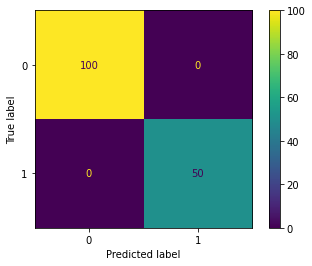

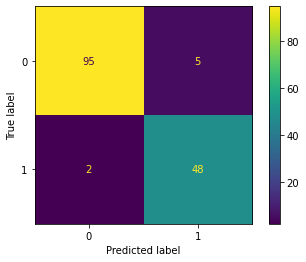

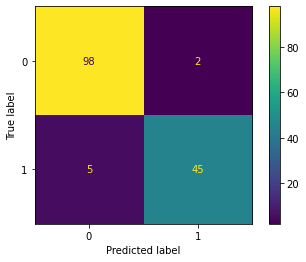

Accuracy: 1.0
Accuracy: 0.9533333333333334
Accuracy: 0.9533333333333334


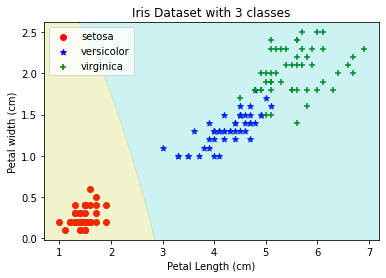

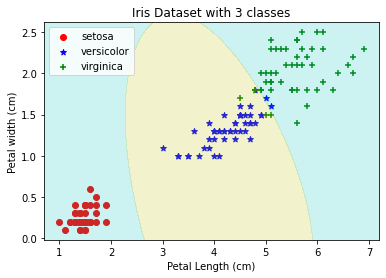

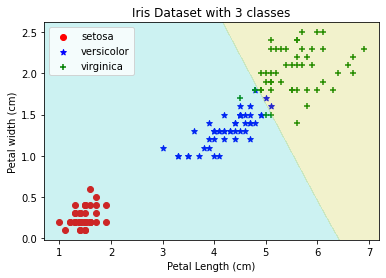

In [140]:
# Build OvR-svc

mSvc1=SVC().fit(X, yBin1)
ySvc1=mSvc1.predict(X)
print(ySvc1)

mSvc2=SVC().fit(X, yBin2)
ySvc2=mSvc2.predict(X)
print(ySvc2)

mSvc3=SVC().fit(X, yBin3)
ySvc3=mSvc3.predict(X)
print(ySvc3)



# Build CONFUSION Matrix
cm1=confusion_matrix(yBin1,ySvc1)
print(cm1)
tn, fp, fn, tp = confusion_matrix(yBin1,ySvc1).ravel()
print('Outcome values : \n', tn, fp, fn, tp)

cm2=confusion_matrix(yBin2,ySvc2)
print(cm2)
tn, fp, fn, tp = confusion_matrix(yBin2,ySvc2).ravel()
print('Outcome values : \n', tn, fp, fn, tp)

cm3=confusion_matrix(yBin3,ySvc3)
print(cm3)
tn, fp, fn, tp = confusion_matrix(yBin3,ySvc3).ravel()
print('Outcome values : \n', tn, fp, fn, tp)


# classification report for precision, recall f1-score and accuracy

matrix1 = classification_report(yBin1,ySvc1)
print('Classification report : \n',matrix1)

matrix2 = classification_report(yBin2,ySvc2)
print('Classification report : \n',matrix2)

matrix3 = classification_report(yBin3,ySvc3)
print('Classification report : \n',matrix3)


disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot() 

disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot() 

disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot() 

plt.show()

# Compute Accuracy
print('Accuracy:', accuracy_score(yBin1, ySvc1))

print('Accuracy:', accuracy_score(yBin2, ySvc2))

print('Accuracy:', accuracy_score(yBin3, ySvc3))

#Plots

plotData(X, y, cls, class_names)
plotRegions(mSvc1)
plt.show()

plotData(X, y, cls, class_names)
plotRegions(mSvc2)
plt.show()

plotData(X, y, cls, class_names)
plotRegions(mSvc3)
plt.show()



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[50  0  0]
 [ 1 46  3]
 [ 0  1 49]]


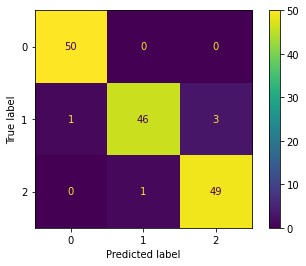

Classification report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.98      0.92      0.95        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Accuracy: 0.9666666666666667
F1: 0.9666666666666667
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True  True  True False
  True  True  True  True  True

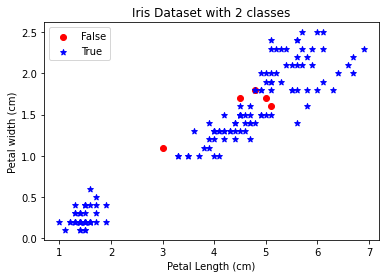

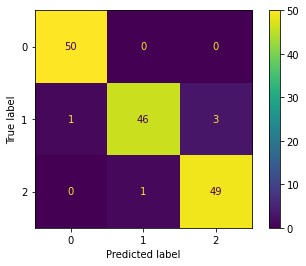

In [145]:
mLr1_probabilities = mLr1.predict_proba(X)[:,1]
mLr2_probabilities = mLr2.predict_proba(X)[:,1]
mLr3_probabilities = mLr3.predict_proba(X)[:,1]
class_probabilities = np.array([mLr1_probabilities,mLr2_probabilities,mLr3_probabilities])
yPargmax=np.argmax(class_probabilities, axis=0)
print (yPargmax)
print (y)

# Build CONFUSION Matrix
cm1=confusion_matrix( y , yPargmax ) 
print(cm1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

# classification report for precision, recall f1-score and accuracy
matrix1 = classification_report(y,yPargmax)
print('Classification report : \n',matrix1)

# Compute Accuracy
print('Accuracy:', accuracy_score(y,yPargmax))
print('F1:', f1_score(y,yPargmax, average='micro'))


#Plot prediction points
w_cValues= y==yPargmax
print(w_cValues)

plotData(X, w_cValues, [0,1], ["False","True"])
disp.plot()
plt.show()

c:\users\mahmoud sami\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\mahmoud sami\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\mahmoud sami\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150

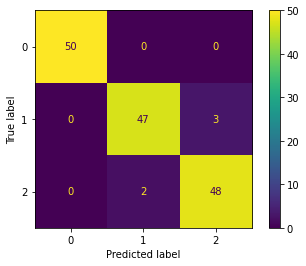

In [146]:
mSvc1=SVC(probability=True).fit(X, yBin1)
mSvc2=SVC(probability=True).fit(X, yBin2)
mSvc3=SVC(probability=True).fit(X, yBin3)

mSvc1_probabilities = mSvc1.predict_proba(X)[:,1]
mSvc2_probabilities = mSvc2.predict_proba(X)[:,1]
mSvc3_probabilities = mSvc3.predict_proba(X)[:,1]
class_probabilities = np.array([mSvc1_probabilities,mSvc2_probabilities,mSvc3_probabilities])

yPargmax=np.argmax(class_probabilities, axis=0)
print (yPargmax)
print (y)

# Build CONFUSION Matrix
cm1=confusion_matrix( y , yPargmax ) 
print(cm1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()

# classification report for precision, recall f1-score and accuracy
matrix1 = classification_report(y,yPargmax)
print('Classification report : \n',matrix1)

# Compute Accuracy
print('Accuracy:', accuracy_score(y,yPargmax))
print('F1:', f1_score(y,yPargmax, average='micro'))

#Plot prediction points
w_cValues= y==yPargmax
print(w_cValues)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



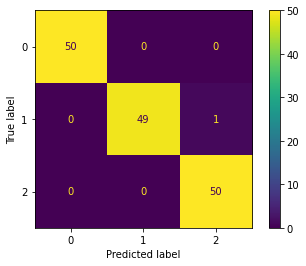

Accuracy: 0.9933333333333333


[Text(167.4, 199.32, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(136.96363636363637, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(197.83636363636364, 163.07999999999998, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(121.74545454545455, 126.83999999999999, 'X[0] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(60.872727272727275, 90.6, 'X[1] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(30.436363636363637, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(91.30909090909091, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(182.61818181818182, 90.6, 'X[1] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(152.1818181818182, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(213.05454545454546, 54.359999999999985, 'X[0] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(182.6181

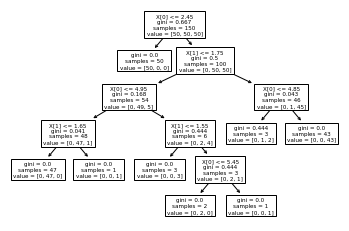

In [147]:
from sklearn import tree

# Build DecisionTree
mDt=tree.DecisionTreeClassifier().fit(X, y)
yDt=mDt.predict(X)
print(yDt)

# Build CONFUSION Matrix
cm1=confusion_matrix(y,yDt)
print(cm1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot() 
plt.show()

# classification report for precision, recall f1-score and accuracy
matrix1 = classification_report(y,yDt)
print('Classification report : \n',matrix1)

# Compute Accuracy
print('Accuracy:', accuracy_score(y, yDt))

#plot the tree
tree.plot_tree(mDt)



In [131]:
#Just for testinggggggggggggggggggggggggggggggggggggggggggggggggggggggg

mLr1_probabilities = mLr1.predict_proba(X)[:,1]
mLr2_probabilities = mLr2.predict_proba(X)[:,1]
mLr3_probabilities = mLr3.predict_proba(X)[:,1]

mLr1_probabilities = np.transpose(mLr1_probabilities )
print( mLr1_probabilities.size )
class_probabilities = np.array([mLr1_probabilities,mLr2_probabilities,mLr3_probabilities])

cls_prop = np.vstack(  (mLr1_probabilities,mLr2_probabilities,mLr3_probabilities ))

print( cls_prop )
#yPargmax=np.argmin(class_probabilities, axis=0)
yPargmax=tree.DecisionTreeClassifier().fit(X, yLr1)
mDt1=tree.DecisionTreeClassifier().fit(X, yLr2)
mDt1=tree.DecisionTreeClassifier().fit(X, yLr3)


print( class_probabilities.size  )
print (yPargmax)
print (y)

# Build CONFUSION Matrix
cm1=confusion_matrix( y , yPargmax ) 
print(cm1)
 
# classification report for precision, recall f1-score and accuracy
matrix1 = classification_report(y,yPargmax)
print('Classification report : \n',matrix1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()

# Compute Accuracy
print('Accuracy:', accuracy_score(y,yPargmax))
print('F1:', f1_score(y,yPargmax, average='micro'))


#Plot prediction points
w_cValues= y==yPargmax
print(w_cValues)


150
[[9.81768704e-01 9.81768704e-01 9.85874431e-01 9.76498059e-01
  9.81768704e-01 9.52249344e-01 9.79737536e-01 9.76498059e-01
  9.81768704e-01 9.78846950e-01 9.76498059e-01 9.69750624e-01
  9.83599670e-01 9.92399386e-01 9.89065837e-01 9.71012842e-01
  9.82538473e-01 9.79737536e-01 9.56914832e-01 9.73895296e-01
  9.61143078e-01 9.71012842e-01 9.93461720e-01 9.47106578e-01
  9.36409236e-01 9.69750624e-01 9.62750668e-01 9.76498059e-01
  9.81768704e-01 9.69750624e-01 9.69750624e-01 9.71012842e-01
  9.78846950e-01 9.81768704e-01 9.76498059e-01 9.89065837e-01
  9.85874431e-01 9.83599670e-01 9.85874431e-01 9.76498059e-01
  9.84293368e-01 9.84293368e-01 9.85874431e-01 9.54207356e-01
  9.22311904e-01 9.79737536e-01 9.69750624e-01 9.81768704e-01
  9.76498059e-01 9.81768704e-01 2.83190176e-03 4.26508208e-03
  1.51575452e-03 1.90587735e-02 3.29402369e-03 5.28482613e-03
  2.28437961e-03 1.41535326e-01 4.08254803e-03 2.21101530e-02
  8.93783611e-02 9.23899142e-03 2.61379698e-02 2.83190176e-03
  5.

TypeError: Expected sequence or array-like, got <class 'sklearn.tree._classes.DecisionTreeClassifier'>